In [1]:
import random
import pandas as pd
class ClusterGenerator:
    def __init__(self):
        self.columns = []
    def column(self, name, center, spread):
        column = {
            'name': name,
            'center': center,
            'spread': spread
        }
        self.columns.append(column)
        return column
    def generate (self, rows, columns):
        data = {}
        for column in columns:
            values = [
                random.gauss(column['center'], column['spread'])
                for _ in range (rows)
            ]
            data [column ['name']] = values
        df = pd.DataFrame(data)
        return df

In [2]:
cg = ClusterGenerator()
# класс мужчины
male_df = cg.generate(1000, [
    cg.column ('age', center = 33, spread = 3),
    cg.column ('height', center = 180, spread = 10)
    ])
# колонка метки пола
male_df['gender'] = 'мужчина'
# класс женщины
female_df = cg.generate(1000, [
    cg.column ('age', center = 27, spread = 3),
    cg.column ('height', center = 170, spread = 10)
    ])
female_df ['gender'] = 'женщина'
df = pd.concat([male_df, female_df]).reset_index(drop = True)
display (df)

import matplotlib.pyplot as plt

,age,height,gender
0,31.098538,172.469959,мужчина
1,31.012554,164.914545,мужчина
2,31.769454,178.640115,мужчина
3,38.186577,184.850880,мужчина
4,34.784085,178.161072,мужчина
...,...,...,...
1995,28.038106,172.688270,женщина
1996,26.242125,169.659076,женщина
1997,20.003847,170.952367,женщина
1998,29.399651,176.618496,женщина


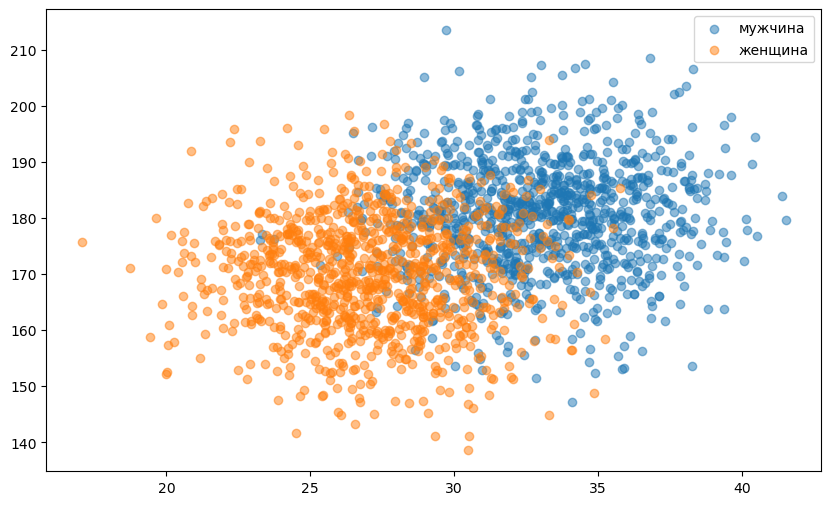

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
for gender in df.gender.unique():
    plt.scatter(
    df[df.gender == gender]['age'],
    df[df.gender == gender]['height'],
    alpha = 0.5,
    label = gender
    )
plt.legend()
plt.show()